#  SRU-ASSIGNMENT-1 / 2017171

In [324]:
import numpy as np
import cmath
from scipy.fftpack import dct
from scipy.fftpack import fft
from matplotlib import pyplot as plt
import librosa as lr
from scipy.cluster.vq import vq, kmeans, whiten
import sys
np.set_printoptions(threshold=sys.maxsize)
import IPython.display as ipd
import math
import librosa.display
from scipy.signal import get_window

Original length:
134976
New length:
262144
Sampling frequency is
22050


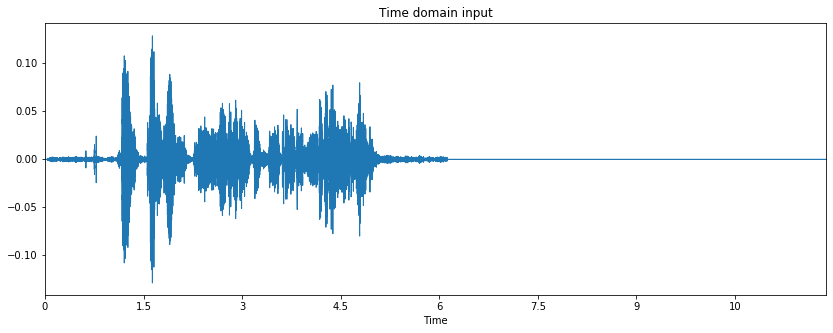

In [325]:
def inputtooutput(audio):
    y,fs=lr.load(audio)
    n=len(y)
    pos=math.ceil(np.log2(n))
    outlength=pow(2,pos)
    if(outlength!=n):
        diff=outlength-n
        outaud=np.pad(y,(0,diff),'constant')
        print('Original length:')
        print(n)
        print('New length:')
        print(len(outaud))
        return outaud,fs
    else:
        print('Original length:')
        print(n)
        print('New length:')
        print(len(outaud))
        return outaud,fs
    
audio='check.wav' #change this name to give any other output
outaud,fs=inputtooutput(audio)
print("Sampling frequency is")
print(fs)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(outaud, sr=fs)
plt.title('Time domain input')          
ipd.Audio(audio)

The Sound Sample says "Hi, This is an audio sample for SRU assignment-1". Here th of this is voiced phoneme and rest are unvoiced. This directory also carries an audio sample cons.wav which says " B C D F G " in which B, D and G are voiced and C and F are unvoiced. 

FFT and Spectogram 

Text(0.5, 1.0, 'FFT using inbuilt code')

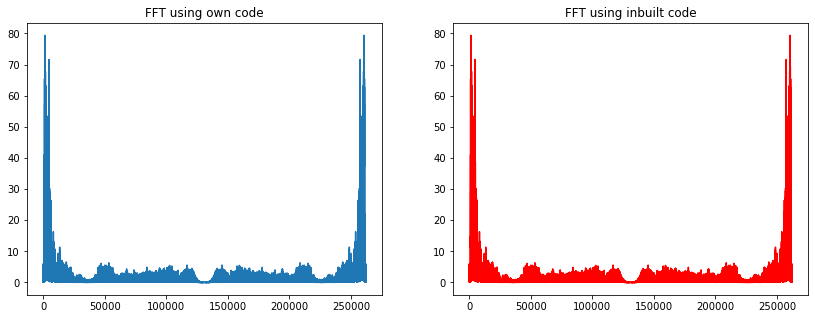

In [326]:
def FFT_own1(x):
    x = np.asarray(x, dtype=float)
    N = len(x)
    n = np.arange(N)
    if N % 2 == 1:
        raise ValueError("Not possible")
    elif N <= 32:
        x = np.asarray(x, dtype=float)
        N = len(x)
        n = np.arange(N)
        k = n.reshape((N, 1))
        M = np.exp(-2j * np.pi * k * n / N)
        return np.dot(M, x)
        
    else:
        even = FFT_own1(x[::2])
        odd = FFT_own1(x[1::2])
        angle = np.exp(-2j * np.pi *n / N)
        return np.concatenate([even + angle[:int(N/2)]*odd,even + angle[int(N/2):] * odd])
fftout=FFT_own1(outaud)
fig=plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(abs(fftout))
plt.title('FFT using own code')
plt.subplot(1,2,2)
plt.plot(abs(fft(outaud)),c='r')
plt.title('FFT using inbuilt code')

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in multiply
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10


Text(0, 0.5, 'Frame Length')

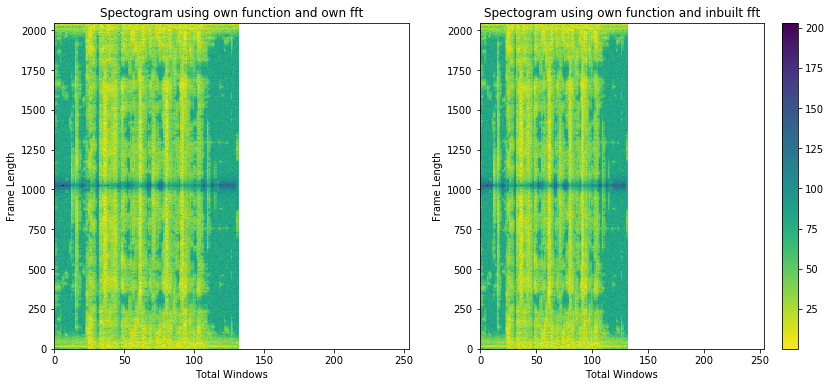

In [327]:
def own_specgram(y,n_fft,noverlap = None):
    if noverlap is None:
        noverlap = n_fft/2
    ffts = []
    noverlap = int(noverlap)
    windows  = np.arange(0,len(y),n_fft-noverlap,dtype=int)
    windows  = windows[windows + n_fft < len(y)]
    for x in windows:
        audioframed=y[x:x+n_fft]
        window = get_window("hann", n_fft, fftbins=True)
        final=audioframed*window
        ts_window = FFT_own1(final) 
        ffts.append(ts_window)
    spec = 20*np.log10(np.array(ffts).T)
    return(windows,spec,ffts)
L = 2048
def own_specgram2(y,n_fft,noverlap = None):
    if noverlap is None:
        noverlap = n_fft/2
    ffts = []
    noverlap = int(noverlap)
    windows  = np.arange(0,len(y),n_fft-noverlap,dtype=int)
    windows  = windows[windows + n_fft < len(y)]
    qpow=[]
    for x in windows:
        audioframed=y[x:x+n_fft]
        window = get_window("hann", n_fft, fftbins=True)
        final=audioframed*window
        ts_window = fft(final)
        ffts.append(ts_window)
    spec = 20*np.log10( np.array(ffts).T)
    return(windows,spec,ffts)
L2 = 2048
windows,spec,ffts=own_specgram(y=outaud,n_fft=L)
windows2,spec2,ffts2 = own_specgram2(y=outaud,n_fft=L2)
powarr=(np.square(abs((np.asarray(ffts2)))))  #power spectrum array
powoutlog = 10 * np.log10(powarr)
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow((abs(spec)), origin="lower", aspect="auto", cmap="viridis_r", interpolation="none")
plt.title('Spectogram using own function and own fft')
plt.xlabel('Total Windows')
plt.ylabel('Frame Length')
plt.subplot(1,2,2)
plt.imshow((abs(spec2)), origin="lower", aspect="auto", cmap="viridis_r", interpolation="none")
plt.colorbar()
plt.title('Spectogram using own function and inbuilt fft')
plt.xlabel('Total Windows')
plt.ylabel('Frame Length')

In the inbuilt Spectogram, only half of the y-axis part is shown

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:7747: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


Text(0.5, 1.0, 'Spectogram using inbuilt')

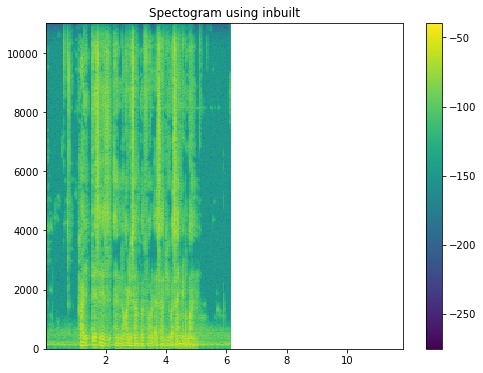

In [328]:
plt.figure(figsize=(8,6))
plt.specgram(x=outaud,Fs=fs,NFFT=L,noverlap=L/2,window=get_window("hann",L),cmap="viridis",sides='onesided',scale='dB')
plt.colorbar()
plt.title('Spectogram using inbuilt')

MFCC

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


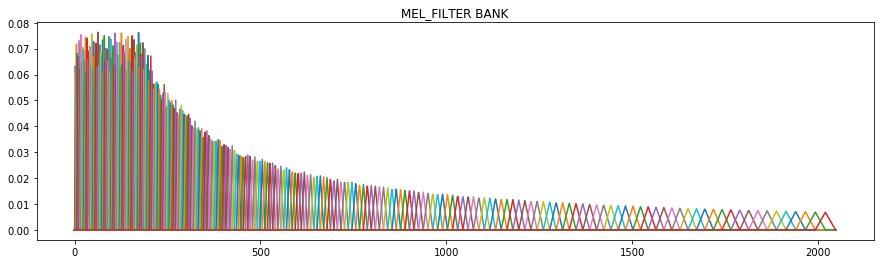

In [329]:
w=powoutlog.shape[0]
melfb = librosa.filters.mel(fs, 4095,w) #generating mel filter bank
plt.figure(figsize=(15,4))
for n in range(melfb.shape[0]):
    plt.plot(melfb[n])
plt.title('MEL_FILTER BANK')
meloutlog = np.dot(melfb,np.transpose(powoutlog))
meloutlog = 20.0 * np.log10(melout)


MFCC is calculated as by taking the dct3 of log of the dot product of power spectral density of the FFT's obtained from the STFT step and the mel-filter bank generated from inbuilt function

MFCC_FEATURES Spectogram:


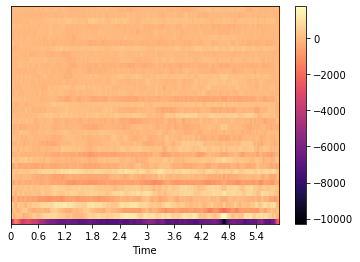

In [330]:
MFCC_feat=dct(meloutlog, type=3, n=39, axis=1, norm=None, overwrite_x=False)
x=librosa.display.specshow(MFCC_feat.T, sr=fs, x_axis='time',cmap='magma')
plt.colorbar()
print("MFCC_FEATURES Spectogram:")

KMEANS-CLUSTERING

Text(0.5, 1.0, 'K-MEANS CLUSTERING OF FIRST 2 FEATURES')

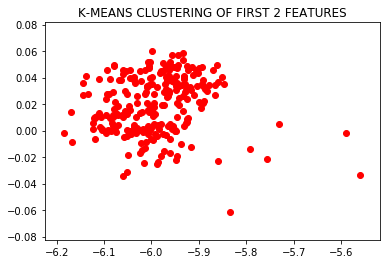

In [331]:
whitened = whiten(MFCC_feat.T)
book = np.array((whitened[0,:],whitened[1,:]))
codebook, distortion = kmeans(whitened, book)
#plt.scatter(whitened[0,:], whitened[1,:],c='b')
plt.scatter(codebook[0,:],codebook[1,:],c='r')
plt.title('K-MEANS CLUSTERING OF FIRST 2 FEATURES')

# When the similar procedure was followed with different sounds, Difference in the MFCC features and Spectogram was observed